In [3]:
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### regression loss
+ MSE
+ MAE
+ Huber loss
+ Los cosh loss
+ Quantile loss

##### Mean Square Error (MSE/ L2 Loss)
$$MSE=Σ_{i=1}^n(y_i-y_i^p)^2$$

In [6]:
def mse(true, pred):
    return np.sum((true - pred)**2)

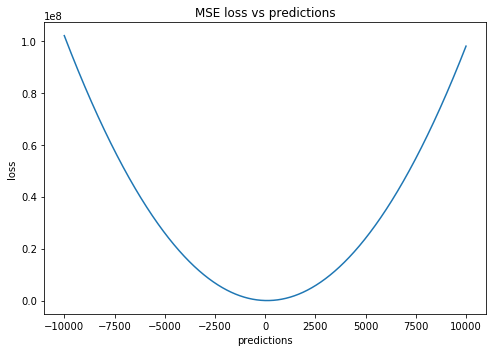

In [7]:
fig, ax1 = plt.subplots(1,1, figsize = (7,5))
true = np.repeat(100,10000)
pred = np.arange(-10000,10000,2)
loss = [mse(pred[i],true[i]) for i in range(len(true))]
ax1.plot(pred,loss)
ax1.set_xlabel('predictions')
ax1.set_ylabel('loss')
ax1.set_title('MSE loss vs predictions')

fig.tight_layout()

##### Mean Absolute Error (MAE/ L1 loss)
$$MAE=Σ_{i=1}^n|y_i-y_i^p|$$

In [8]:
def mae(true, pred):
    return np.sum(np.abs(true - pred))

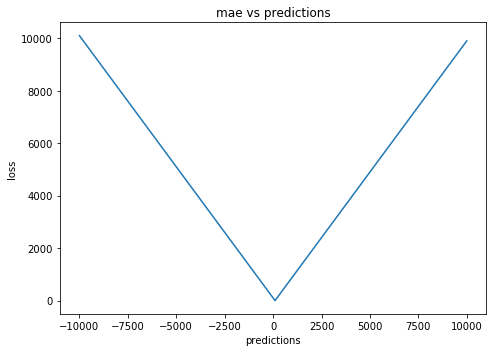

In [11]:
fig, ax1 = plt.subplots(1,1,figsize = (7,5))

true = np.repeat(100,10000)
pred = np.arange(-10000,10000,2)

loss_mae = [mae(true[i], pred[i]) for i in range(len(true))]

ax1.plot(pred, loss_mae)
ax1.set_xlabel('predictions')
ax1.set_ylabel('loss')
ax1.set_title("mae vs predictions")
fig.tight_layout()

##### smooth mean absolute error/ Huber loss

$$ L_δ(y,f(x))=\left\{
\begin{aligned}
& \frac 12 (y-f(x))^2 &  & |y-f(x)|<δ \\
& δ|y-f(x)|-\frac 12 δ^2 &  & otherwise 
\end{aligned}
\right.
$$

In [13]:
def sm_mae(true,pred,delta):
    loss = np.where(np.abs(true-pred)<delta, 0.5*((pred-true)**2), delta*np.abs(pred-true) - 0.5*(delta**2))
    return np.sum(loss)

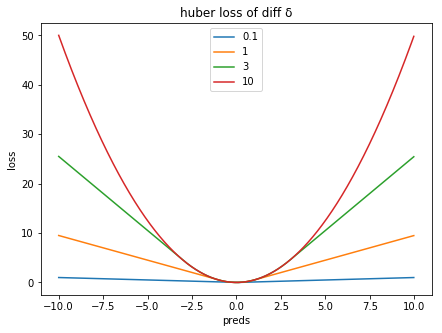

In [21]:
fig, ax1 = plt.subplots(1,1, figsize=(7,5))

true = np.repeat(0,1000)
pred = np.arange(-10,10,0.02)

deltas = [0.1,1,3,10]

losses = [ [sm_mae(true[i],pred[i],delta) for i in range(len(true))] for delta in deltas ]

for i,loss in enumerate(losses):
    ax1.plot(pred,loss, label=deltas[i])
ax1.set_xlabel("preds")
ax1.set_ylabel("loss")
ax1.set_title("huber loss of diff δ")
ax1.legend()


##### log-cosh loss function
$$L(y,y^P)=Σ_{i=1}^nlog(cosh(y_i-y_i^p))$$
>优点：对离群点不敏感，处处二阶可导，方便使用牛顿法求解，可以作为xgb的自定义loss

In [25]:
def log_cosh(true, pred):
    loss = np.log(np.cosh(true-pred))
    return np.sum(loss)

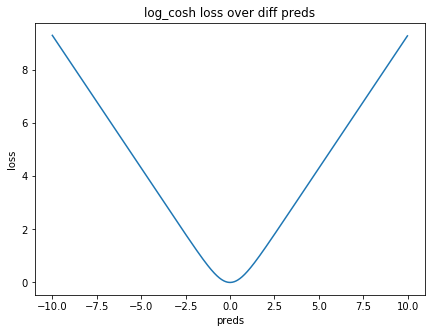

In [27]:
fig, ax1 = plt.subplots(1,1, figsize=(7,5))

true = np.repeat(0,1000)
pred = np.arange(-10,10,0.02)
loss_log_cosh = [log_cosh(true[i],pred[i]) for i in range(len(true))]

ax1.plot(pred, loss_log_cosh)
ax1.set_xlabel("preds")
ax1.set_ylabel("loss")
ax1.set_title("log_cosh loss over diff preds")

##### Quantile loss
$$L_γ(y,y^p)=Σ_{i=y_i<y_i^p}(γ-1)·|y_i-y_i^p| + Σ_{i=y_i\ge y_i^p}(γ)·|y_i-y_i^p|$$
优点：可以通过设置γ的值来调整最终学到的模型，如果γ取0.05和0.95分别训练两个模型，这两个模型预测值之间的区间就是“置信区间”

In [37]:
def quan_loss(true, pred, gamma):
    loss = np.where(true<pred,(1-gamma)*np.abs(true-pred),gamma*np.abs(true-pred))
    return np.sum(loss)

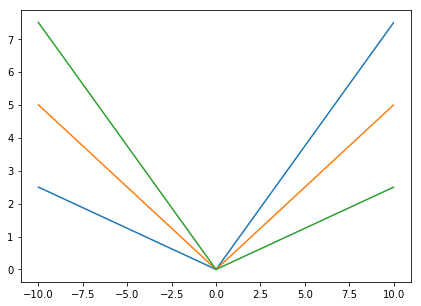

In [38]:
true = np.repeat(0, 1000)
pred = np.arange(-10,10,0.02)

gammas = [0.25,0.5,0.75]

losses = [[ quan_loss(true[i], pred[i],gamma) for i in range(len(true))] for gamma in gammas]

fig, ax1 = plt.subplots(1,1, figsize=(7,5))

for loss in losses:
    ax1.plot(pred, loss)

